# computer vision with opencv

## 0. python imports

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [33]:
print(cv2.getBuildInformation())


General configuration for OpenCV 4.2.0 =====================================
  Version control:               4.2.0

  Platform:
    Timestamp:                   2020-02-02T19:24:09Z
    Host:                        Linux 4.15.0-1028-gcp x86_64
    CMake:                       3.9.0
    CMake generator:             Unix Makefiles
    CMake build tool:            /usr/bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (14 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX

  C/C++:
    Built as dynamic libs?:      NO
    C++ Compiler:                /usr/lib/ccache/com

## 1. image loading

In [34]:
img = cv2.imread('david.jpg', cv2.IMREAD_COLOR)

## 2. display image

opencv version

In [35]:
cv2.namedWindow("david", cv2.WINDOW_NORMAL)
cv2.imshow('david', img)
cv2.resizeWindow("david", 1200, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

matplotlib version

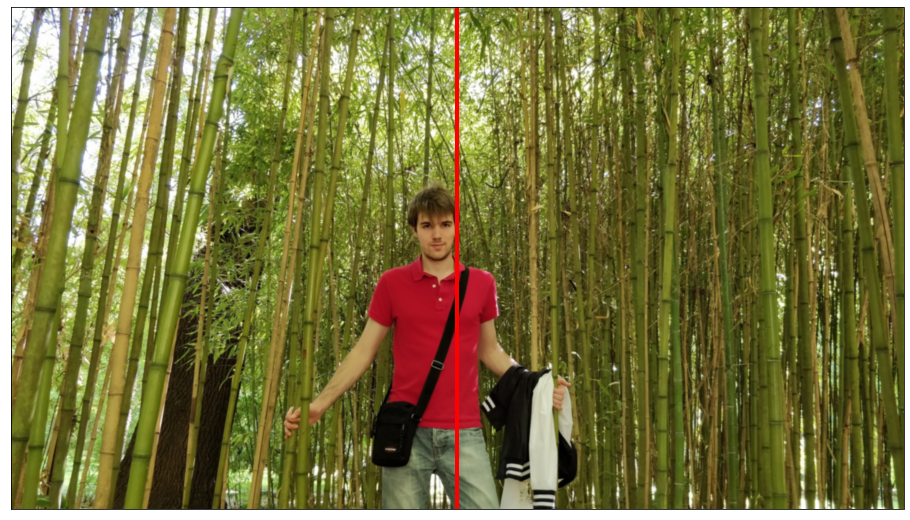

In [36]:
plt.figure(figsize=(16, 16))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.axvline(img.shape[1] / 2, c='r', linewidth=4)
plt.show()

## 3. save image

In [37]:
cv2.imwrite('david_weird.png', img);

## 4. webcam video input

In [38]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('my_webcam_gray', gray)
    cv2.imshow('my_webcam_original', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 5. draw on pictures

In [40]:
img = cv2.imread('david.jpg', cv2.IMREAD_COLOR)

HEIGHT = img.shape[0]
WIDTH = img.shape[1]

cv2.line(img, 
         (WIDTH // 2, 0), 
         (WIDTH // 2, HEIGHT),
         (255, 255, 255), 
         15)

# cv2.line(img, 
#          (0, HEIGHT // 2), 
#          (WIDTH, HEIGHT // 2),
#          (255, 255, 255), 
#          15)

# cv2.line(img, 
#          (0, 0), 
#          (WIDTH, HEIGHT),
#          (255, 0, 0), 
#          15)

# cv2.circle(img,(WIDTH // 2, HEIGHT // 2), 512, (0, 0, 255), 10)

pts = np.array([[100,100],[100,2000],[3000,2000],[3000,100]])
cv2.polylines(img, [pts], True, (0,255,255), 10)

cv2.namedWindow("david_line", cv2.WINDOW_NORMAL)
cv2.imshow('david_line', img)
cv2.resizeWindow("david_line", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6. operations on images

In [15]:
img = cv2.imread('./cristina.jpg', cv2.IMREAD_COLOR)

In [16]:
print(img.shape)
print(img.size)
print(img.dtype)

(3456, 4608, 3)
47775744
uint8


In [17]:
type(img)

numpy.ndarray

single pixel modification

In [18]:
px = img[100, 100]

In [19]:
px

array([ 53, 110,  89], dtype=uint8)

In [20]:
img[100, 100] = [255, 255, 255]

modify regions of image

In [21]:
square_size = 500
HEIGHT = img.shape[0]
WIDTH = img.shape[1]

# with constant pixel value
img[100:1000, 100:1000] = [255, 255, 255]

# with different regions of image (size must be consistent)
img[HEIGHT//3:HEIGHT//3+square_size, 
    WIDTH//3:WIDTH//3+square_size] = img[HEIGHT//2:HEIGHT//2+square_size, 
                                         WIDTH//2:WIDTH//2+square_size]

In [22]:
cv2.namedWindow("image_modified", cv2.WINDOW_NORMAL)
cv2.imshow('image_modified', img)
cv2.resizeWindow("image_modified", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. image arithmetics

In [23]:
img1 = cv2.imread('./david.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('./cristina.jpg', cv2.IMREAD_COLOR)
img2_resized = cv2.resize(img2, img1.shape[:2][::-1], interpolation=cv2.INTER_AREA)

addition as numpy array:

In [24]:
cv2.namedWindow("images_added", cv2.WINDOW_NORMAL)
cv2.imshow('images_added', img1 + img2_resized)
cv2.resizeWindow("images_added", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

addition using opencv:

In [25]:
cv2.namedWindow("images_added", cv2.WINDOW_NORMAL)
cv2.imshow('images_added', cv2.add(img1, img2_resized))
cv2.resizeWindow("images_added", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

addition weighted:

In [29]:
cv2.namedWindow("images_added", cv2.WINDOW_NORMAL)
cv2.imshow('images_added', cv2.addWeighted(img1, .5, img2_resized, .5, 0))
cv2.resizeWindow("images_added", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8. image resizing

In [30]:
img1 = cv2.imread('./david.jpg', cv2.IMREAD_COLOR)
cv2.namedWindow("david", cv2.WINDOW_NORMAL)
cv2.imshow('david', img1)
cv2.resizeWindow("david", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
img1_resized = cv2.resize(img1, (4608 // 3, 2592 // 3), interpolation=cv2.INTER_AREA)
cv2.namedWindow("david_resized", cv2.WINDOW_NORMAL)
cv2.imshow('david_resized', img1_resized)
cv2.resizeWindow("david_resized", 600, 600);
cv2.waitKey(0)
cv2.destroyAllWindows()

## 9. object detection

dnn module: https://docs.opencv.org/4.1.0/d6/d0f/group__dnn.html

In [41]:
THRESHOLD = 0.8

class_names = {0: 'background',
              1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus',
              7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant',
              13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat',
              18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
              24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag',
              32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',
              37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
              41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',
              46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
              51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',
              56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
              61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',
              67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
              75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven',
              80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
              86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

model = cv2.dnn.readNetFromTensorflow('frozen_inference_graph.pb',
                                      'ssd_mobilenet_v2_coco_2018_03_29.pbtxt')

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    model.setInput(cv2.dnn.blobFromImage(frame, size=(300, 300), swapRB=True))
    
    output = model.forward()[0,0,:,:]
    
    for detection in output:
        confidence = detection[2]
        if confidence > THRESHOLD:
            class_id = detection[1]
            class_name = class_names[class_id]
            # print(confidence, class_name)
            
            # rectangles!
            
            box_x=detection[3]
            box_y=detection[4]
            box_width=detection[5]
            box_height=detection[6]
            
            height, width, ch = frame.shape
            
            box_x = detection[3] * width
            box_y = detection[4] * height
            box_width = detection[5] * width
            box_height = detection[6] * height
                                          
            cv2.rectangle(frame, 
                          (int(box_x),
                           int(box_y)),
                          (int(box_width),
                           int(box_height)),
                          (0, 0, 255), 
                          thickness=2)
            
            cv2.putText(frame, 
                        class_name + ' ' + str(round(confidence, 2)),
                        (int(box_x), 
                         int(box_y+.05*height)),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1,
                        (0, 0, 255))
    
    cv2.imshow('object_detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 10. load image from url and not local file

In [46]:
import requests

def display_opencv_normal_size(img, name='image', window_size=(600, 600)):

    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.imshow(name, img)
    cv2.resizeWindow(name, window_size[0], window_size[1])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_url = 'https://thegurus.tech/images/main_header/gurus_header.jpg'
img = cv2.imdecode(np.asarray(bytearray(requests.get(image_url).content), 
                              dtype="uint8"), 
                   cv2.IMREAD_COLOR)

display_opencv_normal_size(img)